In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata['Mouse ID'].value_counts().sort_values()

w140    1
r850    1
e476    1
a251    1
l264    1
       ..
h531    1
c282    1
x209    1
j989    1
w697    1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_grouped = study_results.groupby('Mouse ID')


for x,y in study_grouped.Timepoint:
    if any(y.value_counts() > 1):
        print(x)
        print(y)



g989
107      0
137      0
329      5
360      5
620     10
681     10
815     15
869     15
950     20
1111    20
1195    25
1380    30
1592    35
Name: Timepoint, dtype: int64


In [7]:
print(study_grouped.get_group('g989'))
print(study_results.iloc[107])
print(study_results.iloc[329])

#returning values from the given index clearly doesn't work in the way I want it to 
#however, I can see that the group for mouse g989 returns duplicate timepoints, so I can 
#adjust things manually in this case 

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1
1195     g989         25           56.045564                 1
1380     g989         30           59.082294                 1
1592     g989         35           62.570880                 2
Mouse ID              g989
Timepoint                0
Tumor Volume (mm3)      45
Metastatic Sites         0
Name: 107,

In [8]:
#dropping based on automatically selecting the index
study_results = study_results.drop(study_results.loc[study_results['Mouse ID'] == 'g989'].index)


In [62]:
print(study_results.loc[study_results['Mouse ID'] == 'g989'])
#successful drop; reset index
study_results.reset_index(inplace = True)
study_results['Mouse ID'].value_counts()
#length is now 248

Empty DataFrame
Columns: [level_0, index, Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


q597    10
x773    10
k403    10
w350    10
i334    10
        ..
t573     1
b447     1
l872     1
o848     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

In [55]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [11]:
study_data = study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'inner')
study_data.drop("index",axis = 1, inplace = True)
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
grouped_study_data = study_data.groupby('Drug Regimen')

In [13]:
tumor_mean = grouped_study_data['Tumor Volume (mm3)'].mean()
tumor_median = grouped_study_data['Tumor Volume (mm3)'].median()
tumor_var = grouped_study_data['Tumor Volume (mm3)'].var()
tumor_std = grouped_study_data['Tumor Volume (mm3)'].std()
tumor_SEM = grouped_study_data['Tumor Volume (mm3)'].sem()

In [14]:
summary_stats_df = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_var, 
                                "Standard Deviation":tumor_std, "S.E.M.":tumor_SEM})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,S.E.M.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


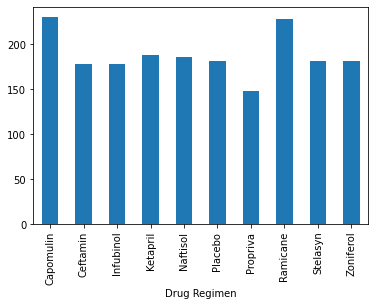

In [15]:
grouped_study_data['Tumor Volume (mm3)'].count().plot(kind = "bar")

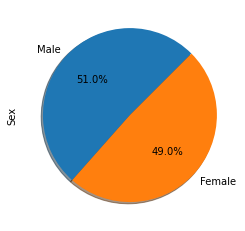

In [16]:
study_data['Sex'].value_counts().plot(kind = 'pie', shadow = True, autopct = '%1.1f%%',
                                     startangle = 45)


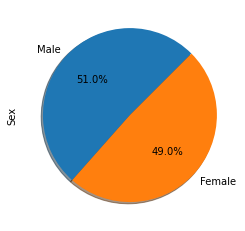

In [17]:
fig, ax = plt.subplots(1,1)
ax.pie(x = study_data['Sex'].value_counts(), labels = ['Male','Female'], autopct = '%1.1f%%', 
                  startangle = 45, shadow = True)
ax.set_ylabel("Sex")
ax.set_aspect('equal')
plt.show()

In [18]:
best_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

print(study_data.Timepoint.value_counts())
#doing this, we can see not every mouse has all time measurements; most don't


0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64


In [19]:
#doing this creates groups of mice with just the specific 

Capomulin_group = pd.DataFrame(study_data.iloc[list(grouped_study_data.groups['Capomulin'])]).reset_index()
Ramicane_group = pd.DataFrame(study_data.iloc[list(grouped_study_data.groups['Ramicane'])]).reset_index()
Infubinol_group = pd.DataFrame(study_data.iloc[list(grouped_study_data.groups['Infubinol'])]).reset_index()
Ceftamin_group = pd.DataFrame(study_data.iloc[list(grouped_study_data.groups['Ceftamin'])]).reset_index()

In [20]:
#looping through each med group

group_list = [Capomulin_group, Ramicane_group, Infubinol_group, Ceftamin_group]


for group in group_list:
    
    #group by mouse id within med group to pull max time value for that mouse
    max_time = group.groupby('Mouse ID')['Timepoint'].max()
    
    #the groupby above returns a list which has mouse names as index, 
    #which let's me compare both the mouse ID and the timepoints in the larger groups
    for ind in max_time.index:
        
        #locate the section of larger group which correspods to the specific mouse and time in 'max_time'
        temp_series = (group.loc[group['Mouse ID'] == ind]['Timepoint'] == max_time[ind])
        
        #assign the max time true/false series to the larger group
        group.loc[temp_series.index,'Max Timepoint'] = temp_series



In [21]:
Capomulin_group[0:20] 
#demonstrates success in this group

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,4,b128,20,42.731552,0,Capomulin,Female,9,22,False
5,5,b128,25,43.262145,1,Capomulin,Female,9,22,False
6,6,b128,30,40.605335,1,Capomulin,Female,9,22,False
7,7,b128,35,37.967644,1,Capomulin,Female,9,22,False
8,8,b128,40,38.379726,2,Capomulin,Female,9,22,False
9,9,b128,45,38.982878,2,Capomulin,Female,9,22,True


In [22]:
best_4_df = Capomulin_group.append(Ramicane_group, ignore_index = True)
best_4_df = best_4_df.append(Infubinol_group, ignore_index = True)
best_4_df = best_4_df.append(Ceftamin_group, ignore_index = True)
best_4_df.drop(columns = ['index'],inplace = True)
#4 best drug programs combined

In [23]:
final_tumor_df = best_4_df.loc[best_4_df['Max Timepoint'] == True,:]
final_tumor_df.reset_index(inplace = True, drop = True)
final_tumor_df.head()
#all the mice from the 4 best drug programs with only their final timepoints loaded in 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,True
1,j246,35,38.753265,1,Capomulin,Female,21,21,True
2,r554,45,32.377357,3,Capomulin,Female,8,17,True
3,s185,45,23.343598,1,Capomulin,Female,3,17,True
4,b742,45,38.939633,0,Capomulin,Male,7,21,True


In [24]:
quartiles_df = pd.DataFrame(columns = ["0.25", "0.50", "0.75"],
                            index = final_tumor_df['Drug Regimen'].unique())


for i in quartiles_df.index:
    for c in quartiles_df.columns:
        quartiles_df.at[i, c] = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == i, 
                                          'Tumor Volume (mm3)'].quantile(float(c))
        

quartiles_df.rename(columns = {'0.25':"25% Quantile", '0.50':'50% Quantile', '0.75':'75% Quantile'}, inplace = True)
quartiles_df['IQR'] = quartiles_df['75% Quantile'] - quartiles_df['25% Quantile']
quartiles_df

#df of data for quantiles + iqr

,25% Quantile,50% Quantile,75% Quantile,IQR
Capomulin,32.3774,38.1252,40.1592,7.78186
Ramicane,31.5605,36.5617,40.659,9.09854
Infubinol,54.0486,60.1652,65.5257,11.4771
Ceftamin,48.7221,59.852,64.2998,15.5778


In [25]:

for i in quartiles_df.iterrows():
    outlier_high = quartiles_df.loc[i[0], '75% Quantile'] +  1.5*quartiles_df.loc[i[0], 'IQR']
    outlier_low = quartiles_df.loc[i[0], '25% Quantile'] -  1.5*quartiles_df.loc[i[0], 'IQR']
    
    print(f'\n{i[0]} Outlier upper bound: ', outlier_high)
    print(f'{i[0]} Outlier lower bound: ', outlier_low)
    
    print(f'\n{i[0]}s Potential High Outliers: {final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == i[0]) & final_tumor_df["Tumor Volume (mm3)"] > outlier_high,:]}')
    print(f'\n{i[0]}s Potential Low Outliers: {final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == i[0]) & (final_tumor_df["Tumor Volume (mm3)"] < outlier_low),:]}')


Capomulin Outlier upper bound:  51.83201549
Capomulin Outlier lower bound:  20.70456164999999

Capomulins Potential High Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Max Timepoint]
Index: []

Capomulins Potential Low Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Max Timepoint]
Index: []

Ramicane Outlier upper bound:  54.30681135
Ramicane Outlier lower bound:  17.912664470000003

Ramicanes Potential High Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Max Timepoint]
Index: []

Ramicanes Potential Low Outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g), Max Timepoint]
Index: []

Infubinol Outlier upper bound:  82.74144559000001
Infu

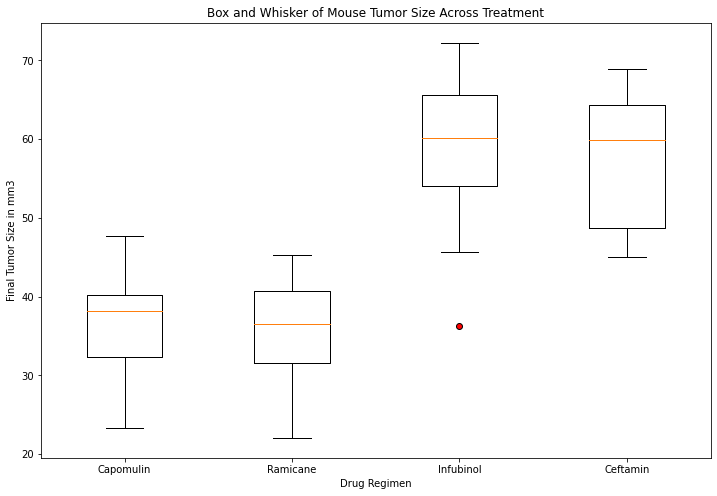

In [26]:


capomulin_plot_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_plot_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_plot_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_plot_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

axis_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
axis_ticks = [1,2,3,4]

plot_list = [capomulin_plot_data, ramicane_plot_data, infubinol_plot_data, ceftamin_plot_data]

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
ax.boxplot(plot_list, flierprops = {'markeredgecolor':'black',
                                    'markerfacecolor':'red'})
ax.set_xticklabels( labels = axis_labels)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Size in mm3')
ax.set_title('Box and Whisker of Mouse Tumor Size Across Treatment')
plt.show()


In [32]:
selected_mouse = np.random.choice(Capomulin_group['Mouse ID'].unique())

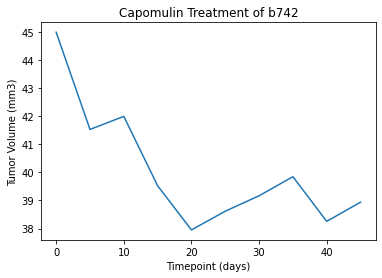

In [33]:
selected_mouse_data = Capomulin_group.loc[Capomulin_group['Mouse ID'] == selected_mouse,:]

plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin Treatment of {selected_mouse}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

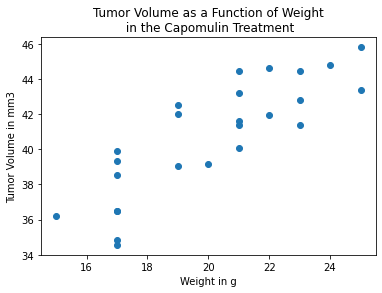

In [41]:
average_tumor_volume = Capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight = Capomulin_group.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(average_weight, average_tumor_volume)
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')
plt.title('Tumor Volume as a Function of Weight\n in the Capomulin Treatment')
plt.show()

In [48]:
slope, intercept, rvalue, pvalue, stderr = sts.linregress(average_weight, average_tumor_volume)
regress_vals = average_weight * slope + intercept

print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

The correlation between mouse weight and the average tumor volume is 0.84


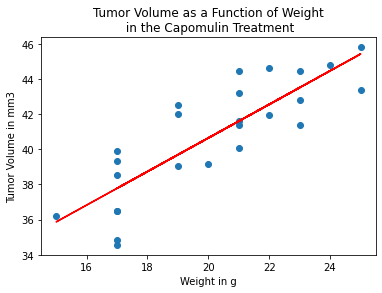

In [54]:
plt.scatter(average_weight, average_tumor_volume)
plt.plot(average_weight, regress_vals, 'r-')
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')
plt.title('Tumor Volume as a Function of Weight\n in the Capomulin Treatment')
plt.show()